# Centralized Training 

In the Centralized Training multi-agent paradigm, training of the agents is performed by a central controller. <br/>
The model for the lever coordination game is fully known and relatively basic. Therefore, the optimal joint action(s) $a = (a_i,a_j)$ can be solved exactly at low computational cost.

In [1]:
from env.lever_game import LeverGame
import numpy as np
import itertools

env = LeverGame()

q_values = np.zeros((env.num_levers,env.num_levers))
for k,l in itertools.product(range(env.num_levers), repeat=2):
    print(f'k,l是:{(k,l)}')
    _, r, _, _ = env.step((k,l))
    
    # Q values are just equal to reward obtained
    q_values[k][l] = r

k,l是:(0, 0)
k,l是:(0, 1)
k,l是:(0, 2)
k,l是:(0, 3)
k,l是:(0, 4)
k,l是:(0, 5)
k,l是:(0, 6)
k,l是:(0, 7)
k,l是:(0, 8)
k,l是:(0, 9)
k,l是:(1, 0)
k,l是:(1, 1)
k,l是:(1, 2)
k,l是:(1, 3)
k,l是:(1, 4)
k,l是:(1, 5)
k,l是:(1, 6)
k,l是:(1, 7)
k,l是:(1, 8)
k,l是:(1, 9)
k,l是:(2, 0)
k,l是:(2, 1)
k,l是:(2, 2)
k,l是:(2, 3)
k,l是:(2, 4)
k,l是:(2, 5)
k,l是:(2, 6)
k,l是:(2, 7)
k,l是:(2, 8)
k,l是:(2, 9)
k,l是:(3, 0)
k,l是:(3, 1)
k,l是:(3, 2)
k,l是:(3, 3)
k,l是:(3, 4)
k,l是:(3, 5)
k,l是:(3, 6)
k,l是:(3, 7)
k,l是:(3, 8)
k,l是:(3, 9)
k,l是:(4, 0)
k,l是:(4, 1)
k,l是:(4, 2)
k,l是:(4, 3)
k,l是:(4, 4)
k,l是:(4, 5)
k,l是:(4, 6)
k,l是:(4, 7)
k,l是:(4, 8)
k,l是:(4, 9)
k,l是:(5, 0)
k,l是:(5, 1)
k,l是:(5, 2)
k,l是:(5, 3)
k,l是:(5, 4)
k,l是:(5, 5)
k,l是:(5, 6)
k,l是:(5, 7)
k,l是:(5, 8)
k,l是:(5, 9)
k,l是:(6, 0)
k,l是:(6, 1)
k,l是:(6, 2)
k,l是:(6, 3)
k,l是:(6, 4)
k,l是:(6, 5)
k,l是:(6, 6)
k,l是:(6, 7)
k,l是:(6, 8)
k,l是:(6, 9)
k,l是:(7, 0)
k,l是:(7, 1)
k,l是:(7, 2)
k,l是:(7, 3)
k,l是:(7, 4)
k,l是:(7, 5)
k,l是:(7, 6)
k,l是:(7, 7)
k,l是:(7, 8)
k,l是:(7, 9)
k,l是:(8, 0)
k,l是:(8, 1)
k,l是:(8, 2)
k,l是

and so the Q-table looks as follows

[[0.9 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


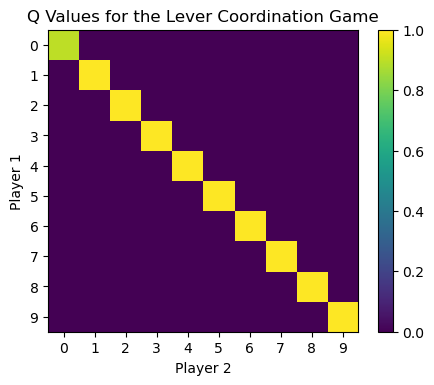

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=100, figsize=[5,4])
print(q_values)
image = ax.imshow(q_values, vmin=0, vmax=1, aspect='auto')
ax.set_yticks(range(env.num_levers))
ax.set_xticks(range(env.num_levers))
ax.set_title('Q Values for the Lever Coordination Game')
ax.set_ylabel('Player 1')
ax.set_xlabel('Player 2')

fig.colorbar(image, ax=ax)
plt.show()

## Central Execution
In the paradigm of centralized execution, there is a centralized controller responsible for the execution of each agent's action. <br/>
In this scenario, the optimal policy $\pi \in (a_i,a_j)$ would be to execute one of the optimal joint actions found above: $\big \{(a_i,a_i) \: \big | \text{ where } a_i \text{ is any lever other than 0}  \big \}$. <br/>
An example of an optimal policy would be $\pi = (1,1)$.

## Decentral Execution
In the paradigm of decentral execution, the goal of training is to find the optimal policy $\pi_i \in a_i$ that an isolated agent $i$ can execute without any real-time knowledge of their partner's state/policy. <br/>
However, as there is centralized training, a central controller can decide on the two policies $\pi_i$ and $\pi_j$ that should be followed by agents $i$ and $j$ once execution has started. <br/>
So, the optimal policy would be for both $\pi_i$ and $\pi_j$ to 'agree' beforehand on a single lever $a_i$ (other than lever 0) to both select during execution. <br/>
An example of an optimal policy would be $\pi_i = 1$ and $\pi_j = 1$.

In [9]:
x,y = np.where(q_values == np.max(q_values))

1.0